In [ ]:
%matplotlib inline

In [ ]:
import numpy

In [ ]:
class NeuralNet():

  def __init__(self):
    self.weights = 2 * np.random.random((3,1)) -1 

  def activation(self,x):
    return 1/(1+ np.exp(-x))

  def act_derivative(self,x):
    return x * (1-x) 

  def forward(self,input):
    out = self.activation(np.dot(input.astype('float32'),self.weights))
    return out

  def fit(self,input_x,output_y,iterations):

    for iter in range(iterations):
      output = self.forward(input_x)
      error = output_y - output
      weights_adj = np.dot(input_x.T, error * self.act_derivative(output))
      self.weights += weights_adj

      

In [ ]:
print(x_train.shape ,y_train.shape)


(4, 3) (4,)


In [ ]:
model = NeuralNet()

x_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

y_train = np.array([[0,1,1,0]]).T

model.fit(x_train,y_train,10000)


In [ ]:
model.forward(np.array([1,0,0]))

array([0.99993706])

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Секция Импорта библиотек



In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     # MNIST dataset 
from keras.models import Sequential  # Model Нейронной сети

from keras.layers.core import Dense, Dropout, Activation # Функции Активации и Слои нейронной сети
from keras.utils import np_utils                      

## Загружаем тренировочные данные


In [ ]:
#  60,000 28 x 28 pixel тренировочные изображения и  10,000 28 x 28 pixel тестовые изображения
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Выведем несколько примеров данных

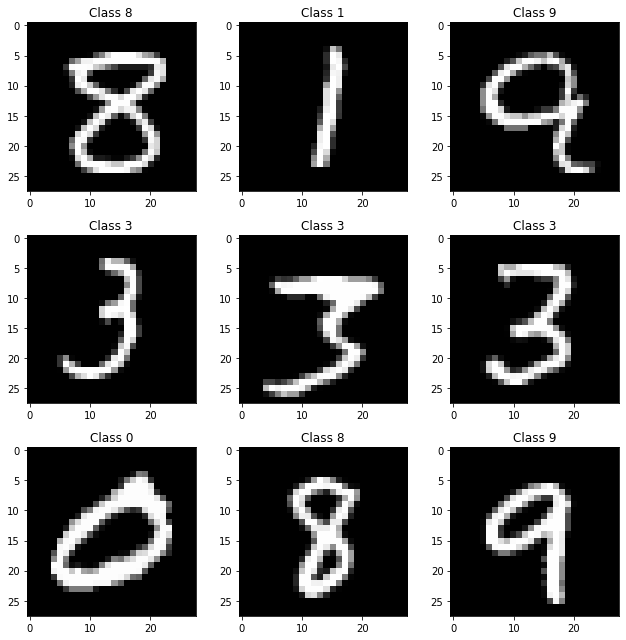

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[120])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    9    7   13  117  191   76    7    6    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    2   83  100  145  223  167  173  253  253  253  203  133  145   65    7    0    0    0    0    0  0  0  0  0  
0  0  0  0  106  253  253  253  253  253  253  253  253  253  254  253  253  253  184   38    0    0    0    0  0  0  0  0  


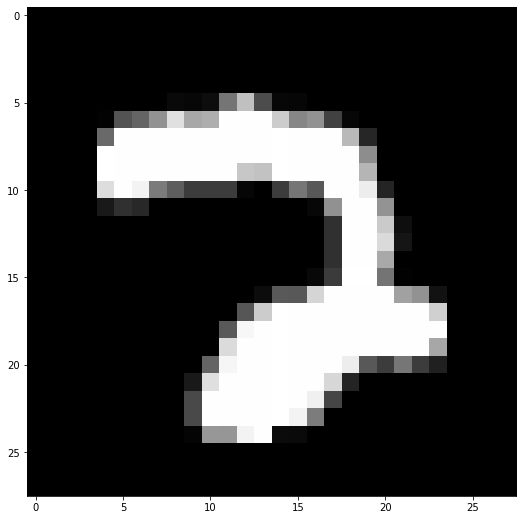

In [ ]:
plt.imshow(X_train[120], cmap='gray', interpolation='none')

Каждый пиксель представляет собой 8-битное целое число от 0 до 255. 0 - полностью черный, а 255 - полностью белый. Это то, что мы называем одноканальным пикселем. Это называется монохромный.

## Форматирование слоя входных данных

Вместо матрицы 28 x 28 мы строим нашу сеть так, чтобы она принимала вектор длиной 784.

Затем каждое изображение необходимо преобразовать в вектор. Мы также нормализуем входные данные, чтобы они находились в диапазоне [0-1], а не [0-255].

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                       
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
y_train[10]

3

In [ ]:
 0  1  2  3  4  5  6  7  8  9 
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


Затем мы модифицируем наши классы (уникальные цифры), чтобы они были в  one-hot формате:

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

Если конечный результат нашей сети очень близок к одному из этих классов, то, скорее всего, на изображении именно этот класс. Например, если окончательный результат:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
то наиболее вероятно, что это изображение цифры `1`.

In [ ]:
nb_classes = 10 # Кол-во классов (всего 10 цифр)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
y_train[10]

3

In [ ]:
Y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Building a 3-layer fully connected network (FCN)

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [ ]:
model = Sequential()

## The first hidden layer

In [ ]:


model.add(Dense(512, input_shape=(784,))) 

In [ ]:

model.add(Activation('relu'))

$$f(x) = max (0,x)$$
<img src = 'relu.jpg' >

In [ ]:

# Dropout - это аналог регуляризации в нейронных сетях
model.add(Dropout(0.2))

## Adding the second hidden layer

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## The Final Output Layer

In [ ]:

# Последний уровень FCN должен быть равен количеству желаемых классов (в данном случае 10).
model.add(Dense(10))

In [ ]:
model.add(Activation('softmax'))


In [ ]:
# Вывод получившейся нейронной сети:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## Сборка модели

Keras построен на основе Theano и TensorFlow. Оба пакета позволяют вам определять граф вычислений в Python, который затем компилируется и эффективно запускается на CPU или GPU без дополнительных затрат на интерпретатор Python.

При составлении модели Keras просит вас указать вашу функцию потерь и ваш оптимизатор. Функция потерь, которую мы здесь будем использовать, называется категориальной кросс-энтропией и является функцией потерь, хорошо подходящей для сравнения двух распределений вероятностей.

Оптимизатор помогает определить, насколько быстро модель обучается с помощью градиентного спуска. Скорость, с которой сходится градиент, называется скоростью обучения.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Обучение нейронной сети!


batch_size определяет, сколько данных на шаг используется для вычисления функции потерь, градиентов и обратного распространения. Большие размеры пакетов позволяют сети быстрее завершить обучение; Однако следует учитывать и другие факторы, помимо скорости тренировки.

Слишком большой размер batch_sizeкета сглаживает локальные минимумы функции потерь, d hезультате чего оптимизатор застревает в Локальном минимуме.

Слишком маленький размер batch_sizeкета создает очень "зашумленную" функцию потерь, и оптимизатор может никогда не найти глобальный минимум.


In [ ]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2171 - accuracy: 0.9330
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1035 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0819 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0654 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0589 - accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0468 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0415 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.037

## Проверим точность модели

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9795
Test score: 0.09646008163690567
Test accuracy: 0.9794999957084656


In [ ]:
model.predict(X_test)[0]

array([0.0000000e+00, 1.4536477e-24, 4.7228269e-35, 0.0000000e+00,
       5.1579649e-28, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 5.2508117e-22], dtype=float32)

In [ ]:
predicted_classes = np.argmax(model.predict(X_test),axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
incorrect_indices[0]

8

In [ ]:
np.argmax(model.predict(X_test),axis=1).shape

(10000,)

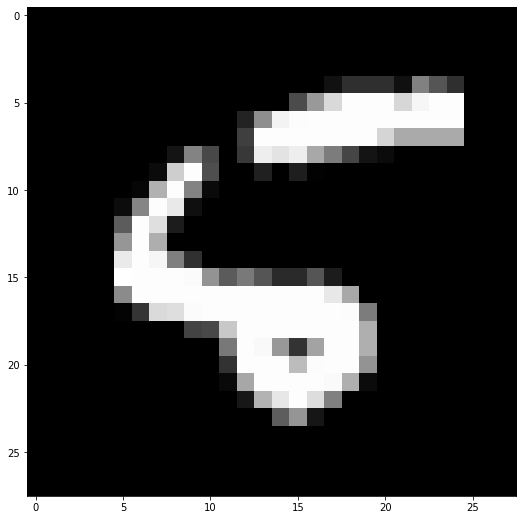

In [ ]:
plt.imshow(X_test[[incorrect_indices[0]]].reshape(28,28), cmap='gray', interpolation='none')

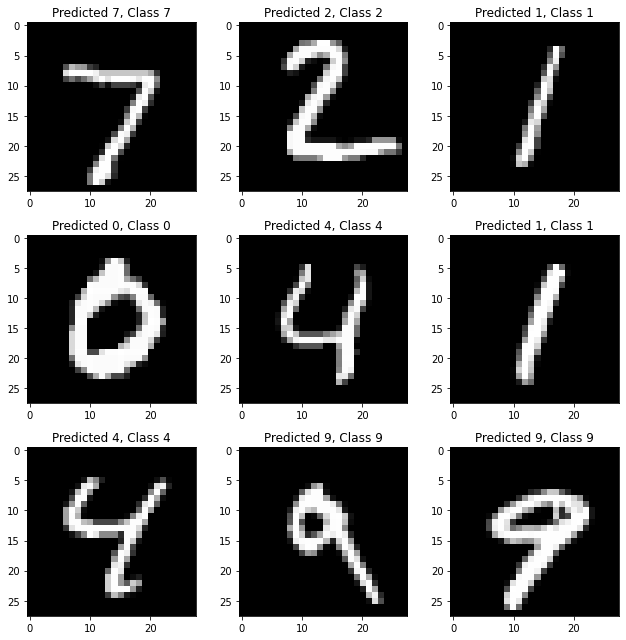

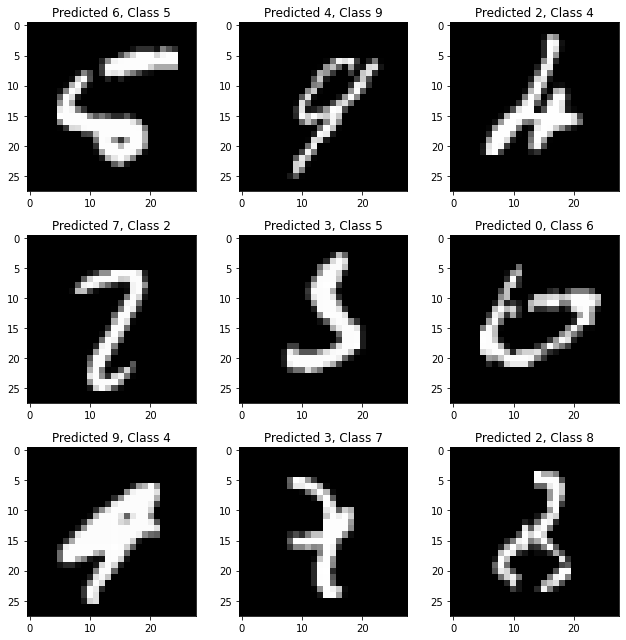

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# Сверточные Нейронные Сети

##  "Deep" Convolutional Neural Network

In [ ]:
# import 


from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

In [ ]:
BatchNormalization.BatchNormalization()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:


X_train = X_train.reshape(60000, 28, 28, 1) 
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         
X_test = X_test.astype('float32')

X_train /= 255                              
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
# one-hot формат

nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()                                 

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 РАЗНЫХ! 3x3 kernels -- это 32 карты с признаками
model.add(BatchNormalization(axis=-1))                
convLayer01 = Activation('relu')                    
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        
convLayer02 = MaxPooling2D(pool_size=(2,2))          # MaxPool операция 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 РАЗНЫХ! 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))              
convLayer03 = Activation('relu')                     
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # MaxPool операция 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Разворачиваем матрицу 4x4x64 в 1024-мерный плоский вектор

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 нейронов
model.add(BatchNormalization())               
model.add(Activation('relu'))                      

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout 
model.add(Dense(10))                                 # выходной слой 10 нейронов
model.add(Activation('softmax'))                     # softmax  (перевзвешивает все предсказания для получения значения в диапазоне 0..1)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.0865 - accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0420 - accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0152 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.00

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9925
Test score: 0.029358703643083572
Test accuracy: 0.9925000071525574


In [ ]:
from keras import backend as K


img = X_test[3]
img = np.expand_dims(img, axis=0) 


def visualize(layer):
    inputs = [K.learning_phase()] + model.inputs
    
    _convout1_f = K.function(inputs, [layer.output])
    
    def convout1_f(X):
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))
    
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')


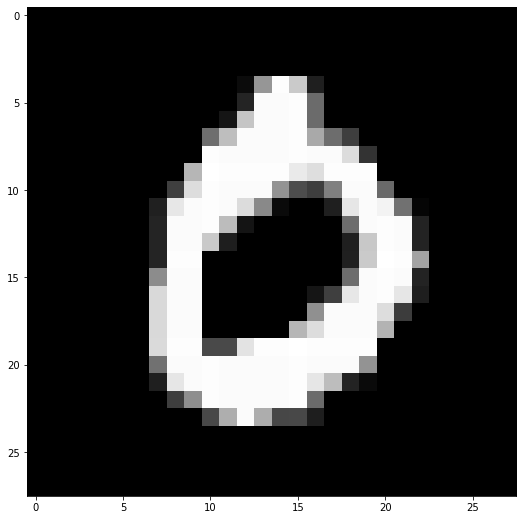

In [ ]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

In [ ]:
visualize(convLayer01) 

ValueError: ignored

In [ ]:
visualize(convLayer02) 

In [ ]:
visualize(convLayer03)

In [ ]:
visualize(convLayer04)